In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read training data
train = pd.read_json('../data/train.json')
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
train.shape

(39774, 3)

In [4]:
# count the number of null values in each column
train.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [5]:
# check the type of ingredients
type(train.loc[0, 'ingredients'])

list

So ingredients are stored as a list of strings, not as a string

In [6]:
cuisines = train.cuisine.value_counts()

In [7]:
cuisines.shape

(20L,)

In [8]:
# class distribution
cuisines

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

# Exploratory Visualisation

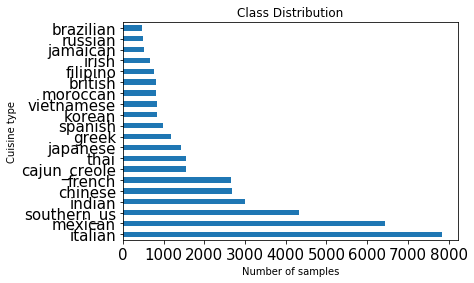

In [9]:
cuisines.plot.barh(title='Class Distribution', fontsize=15)
plt.savefig('Cusines.png')
plt.xlabel('Number of samples')
plt.ylabel('Cuisine type')
plt.show()

In [10]:
# count the number of ingredients in each recipe
train['num_of_ingredients'] = train.ingredients.apply(len)
train.head()

,cuisine,id,ingredients,num_of_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [12]:
# for each cuisine, calculate the mean number of ingredients
train.groupby('cuisine').num_of_ingredients.mean()

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: num_of_ingredients, dtype: float64

In [13]:
# for each cuisine describe the number of ingredients
train.groupby('cuisine').num_of_ingredients.describe()


,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,467.0,9.520343,5.555139,2.0,5.0,9.0,13.0,59.0
british,804.0,9.708955,4.165011,2.0,7.0,9.0,12.0,30.0
cajun_creole,1546.0,12.617076,4.611601,2.0,9.0,12.0,16.0,31.0
chinese,2673.0,11.982791,4.042125,2.0,9.0,12.0,14.0,38.0
filipino,755.0,10.000000,3.855135,2.0,7.0,10.0,12.0,38.0
french,2646.0,9.817838,4.144744,1.0,7.0,9.0,12.0,31.0
greek,1175.0,10.182128,3.729461,1.0,7.0,10.0,12.0,27.0
indian,3003.0,12.705961,5.016806,1.0,9.0,12.0,16.0,49.0
irish,667.0,9.299850,3.700505,2.0,7.0,9.0,12.0,27.0


# As part of Feature Engineering lets add more features 

In [14]:
def number_of_ingredients(df):
    df['num_of_ingredients'] = df.ingredients.apply(len)
    return df

In [15]:
def mean_ingredient_length(df):
    df['ingredient_length'] = df.ingredients.apply(lambda x: np.mean([len(item) for item in x]))
    return df

In [16]:
ing = train.loc[5, 'ingredients']

In [17]:
ing

[u'plain flour',
 u'sugar',
 u'butter',
 u'eggs',
 u'fresh ginger root',
 u'salt',
 u'ground cinnamon',
 u'milk',
 u'vanilla extract',
 u'ground ginger',
 u'powdered sugar',
 u'baking powder']

In [18]:
type(ing)

list

# converting this list of strings into list to make the Countvectoriser process easy

In [19]:
def ingredients_as_string(df):
    df['ingredients_string'] = df.ingredients.astype(str)
    return df

In [20]:
# calling the functions defined above to create new features
train = number_of_ingredients(train)
train = mean_ingredient_length(train)
train = ingredients_as_string(train)

In [21]:
# our dataset with new features
train.head()

,cuisine,id,ingredients,num_of_ingredients,ingredient_length,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"[u'romaine lettuce', u'black olives', u'grape ..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"[u'plain flour', u'ground pepper', u'salt', u'..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333,"[u'eggs', u'pepper', u'salt', u'mayonaise', u'..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000,"[u'water', u'vegetable oil', u'wheat', u'salt']"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000,"[u'black pepper', u'shallots', u'cornflour', u..."


# Base line model -- Naive Bayes

In [22]:
# define X and y
X = train.ingredients_string
y = train.cuisine

In [23]:
# Now X was converted into series of ster
X.head()

0    [u'romaine lettuce', u'black olives', u'grape ...
1    [u'plain flour', u'ground pepper', u'salt', u'...
2    [u'eggs', u'pepper', u'salt', u'mayonaise', u'...
3      [u'water', u'vegetable oil', u'wheat', u'salt']
4    [u'black pepper', u'shallots', u'cornflour', u...
Name: ingredients_string, dtype: object

In [24]:
ing = train.loc[5, 'ingredients_string']

In [25]:
ing

"[u'plain flour', u'sugar', u'butter', u'eggs', u'fresh ginger root', u'salt', u'ground cinnamon', u'milk', u'vanilla extract', u'ground ginger', u'powdered sugar', u'baking powder']"

In [26]:
# we have successfully created new features which are of string type
type(ing)


str

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [29]:
# create a pipeline of vectorization and Naive Bayes
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(vect, nb)

In [30]:
# examine the pipeline steps
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
          dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [31]:
# pipeline steps are automatically assigned names by make_pipeline
pipe.named_steps.keys()

['multinomialnb', 'countvectorizer']

In [32]:
param_grid = {}
param_grid['countvectorizer__max_df'] = [0.03, 0.02]
param_grid

{'countvectorizer__max_df': [0.03, 0.02]}

In [33]:
# pass the pipeline to GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [34]:
%time grid.fit(X, y)

Wall time: 23.8 s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1)..., vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'countvectorizer__max_df': [0.03, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
# scores for all combination of parameters
grid.grid_scores_

C:\Users\SMARASAN\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.66898, std: 0.00539, params: {'countvectorizer__max_df': 0.03},
 mean: 0.64489, std: 0.00564, params: {'countvectorizer__max_df': 0.02}]

In [119]:
# applying the same functions to test data as well to create new features
test_data = pd.read_json('../data/test.json')
test_data = number_of_ingredients(test_data)
test_data = mean_ingredient_length(test_data)
test_data = ingredients_as_string(test_data) 

In [120]:
X_new = test_data.ingredients_string

In [82]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.1, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [121]:
# GridSearchCV automatically refits the best model from the possible combinations
test_data_pred = grid.predict(X_new)
test_data_pred

array([u'indian', u'southern_us', u'italian', ..., u'italian',
       u'southern_us', u'mexican'],
      dtype='<U12')

In [122]:
pd.DataFrame({'id':test_data.id, 'cuisine':test_data_pred}).set_index('id').to_csv('sub_nb.csv')

In [98]:
train.head()

,cuisine,id,ingredients,num_of_ingredients,ingredient_length,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"[u'romaine lettuce', u'black olives', u'grape ..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"[u'plain flour', u'ground pepper', u'salt', u'..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333,"[u'eggs', u'pepper', u'salt', u'mayonaise', u'..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000,"[u'water', u'vegetable oil', u'wheat', u'salt']"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000,"[u'black pepper', u'shallots', u'cornflour', u..."


In [101]:
# the idea is to apply feature union (adding features to a document matrix)

In [36]:
# this funciton will return the features which we have created as part of our feature engineering process
def new_features(df):
     return df.loc[:, ['num_of_ingredients', 'ingredient_length']]

In [37]:
new_features(train).head()

,num_of_ingredients,ingredient_length
0,9,12.000000
1,11,10.090909
2,12,10.333333
3,4,6.750000
4,20,10.100000


In [38]:
# create a transformer
from sklearn.preprocessing import FunctionTransformer
new_features_ft = FunctionTransformer(new_features, validate=False)
type(new_features_ft)

sklearn.preprocessing._function_transformer.FunctionTransformer

In [39]:
new_features_ft.transform(train).head(10)

,num_of_ingredients,ingredient_length
0,9,12.000000
1,11,10.090909
2,12,10.333333
3,4,6.750000
4,20,10.100000
5,12,10.083333
6,13,10.923077
7,10,11.300000
8,13,12.538462
9,6,13.833333


In [40]:
# function to return ingredients in string format
def get_ingredients(df):    
    return df.ingredients_string


In [41]:
new_features_ingredients = FunctionTransformer(get_ingredients, validate=False)
new_features_ingredients.transform(train).head(10)

0    [u'romaine lettuce', u'black olives', u'grape ...
1    [u'plain flour', u'ground pepper', u'salt', u'...
2    [u'eggs', u'pepper', u'salt', u'mayonaise', u'...
3      [u'water', u'vegetable oil', u'wheat', u'salt']
4    [u'black pepper', u'shallots', u'cornflour', u...
5    [u'plain flour', u'sugar', u'butter', u'eggs',...
6    [u'olive oil', u'salt', u'medium shrimp', u'pe...
7    [u'sugar', u'pistachio nuts', u'white almond b...
8    [u'olive oil', u'purple onion', u'fresh pineap...
9    [u'chopped tomatoes', u'fresh basil', u'garlic...
Name: ingredients_string, dtype: object

FeatureUnion applies a list of transformers in parallel to the input data
This is useful for combining several feature extraction mechanisms into a single transformer.

In [42]:
from sklearn.pipeline import make_union
from sklearn.pipeline import make_pipeline

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [44]:
union = make_union(make_pipeline(new_features_ingredients, vect), new_features_ft)
pipe = make_pipeline(union, log_reg)

In [45]:
pipe.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(memory=None,
       steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_ingredients at 0x0000000011DC4668>,
            inv_kw_args=None, inverse_func=None, kw_args=None,
            pass_y='deprecated', validate=Fals... inv_kw_args=None, inverse_func=None, kw_args=None,
            pass_y='deprecated', validate=False))],
         transformer_weights=None)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [46]:
param_grid = {}
param_grid['featureunion__pipeline__countvectorizer__token_pattern'] = [r"\b\w\w+\b", r"'([a-z ]+)'"]
# param_grid['featureunion__pipeline__countvectorizer__max_df'] = [0.05, 0.06, 0.04, 0.07, 0.1]
param_grid['featureunion__pipeline__countvectorizer__ngram_range'] = [(1,1), (1,2)]
# param_grid['logisticregression__C'] = [0.01, 0.1, 0.4, 0.6, 0.5, 1]
# param_grid

# param_grid = {}
# param_grid['featureunion__pipeline__countvectorizer__token_pattern'] = [r"\b\w\w+\b"]
param_grid['featureunion__pipeline__countvectorizer__max_df'] = [ 0.05, 0.06, 0.09, 0.1]
# param_grid['featureunion__pipeline__countvectorizer__ngram_range'] = [(1,2)]
param_grid['logisticregression__C'] = [0.3, 0.4, 0.5]
param_grid

{'featureunion__pipeline__countvectorizer__max_df': [0.05, 0.06, 0.09, 0.1],
 'featureunion__pipeline__countvectorizer__ngram_range': [(1, 1), (1, 2)],
 'featureunion__pipeline__countvectorizer__token_pattern': ['\\b\\w\\w+\\b',
  "'([a-z ]+)'"],
 'logisticregression__C': [0.3, 0.4, 0.5]}

In [47]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='micro')

In [48]:
# pass the pipeline (instead of the model) to GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=20, scoring=scorer)

In [49]:
grid

GridSearchCV(cv=20, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_ingredients at 0x0000000011DC4668>,
          inv_kw_args=None, inverse_func=None, kw_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'featureunion__pipeline__countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"], 'featureunion__pipeline__countvectorizer__max_df': [0.05, 0.06, 0.09, 0.1], 'featureunion__pipeline__countvectorizer__ngram_range': [(1, 1), (1, 2)], 'logisticregression__C': [0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=micro), verbose=0)

In [50]:
grid.fit(train, y)

GridSearchCV(cv=20, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_ingredients at 0x0000000011DC4668>,
          inv_kw_args=None, inverse_func=None, kw_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'featureunion__pipeline__countvectorizer__token_pattern': ['\\b\\w\\w+\\b', "'([a-z ]+)'"], 'featureunion__pipeline__countvectorizer__max_df': [0.05, 0.06, 0.09, 0.1], 'featureunion__pipeline__countvectorizer__ngram_range': [(1, 1), (1, 2)], 'logisticregression__C': [0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=micro), verbose=0)

In [52]:
# examine the score for each combination of parameters
grid.grid_scores_

C:\Users\SMARASAN\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72907, std: 0.00978, params: {'featureunion__pipeline__countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'featureunion__pipeline__countvectorizer__max_df': 0.05, 'featureunion__pipeline__countvectorizer__ngram_range': (1, 1), 'logisticregression__C': 0.3},
 mean: 0.73284, std: 0.00958, params: {'featureunion__pipeline__countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'featureunion__pipeline__countvectorizer__max_df': 0.05, 'featureunion__pipeline__countvectorizer__ngram_range': (1, 1), 'logisticregression__C': 0.4},
 mean: 0.73407, std: 0.00991, params: {'featureunion__pipeline__countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'featureunion__pipeline__countvectorizer__max_df': 0.05, 'featureunion__pipeline__countvectorizer__ngram_range': (1, 1), 'logisticregression__C': 0.5},
 mean: 0.75763, std: 0.00886, params: {'featureunion__pipeline__countvectorizer__token_pattern': "'([a-z ]+)'", 'featureunion__pipeline__countvectorizer__max_df': 0.05, 'featureunion__pipeline__countvec

In [53]:
# print the single best score and parameters that produced that score
print(grid.best_score_)
print(grid.best_params_)

0.786166842661
{'featureunion__pipeline__countvectorizer__token_pattern': '\\b\\w\\w+\\b', 'featureunion__pipeline__countvectorizer__max_df': 0.09, 'featureunion__pipeline__countvectorizer__ngram_range': (1, 2), 'logisticregression__C': 0.4}


In [54]:
test_data = pd.read_json('../data/test.json')
test_data = number_of_ingredients(test_data)
test_data = mean_ingredient_length(test_data)
test_data = ingredients_as_string(test_data) 

In [58]:
test_data.head()

,id,ingredients,num_of_ingredients,ingredient_length,ingredients_string
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333,"[u'baking powder', u'eggs', u'all-purpose flou..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727,"[u'sugar', u'egg yolks', u'corn starch', u'cre..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667,"[u'sausage links', u'fennel bulb', u'fronds', ..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21,12.000000,"[u'meat cuts', u'file powder', u'smoked sausag..."
4,35687,"[ground black pepper, salt, sausage casings, l...",8,13.000000,"[u'ground black pepper', u'salt', u'sausage ca..."


In [56]:
# test_data_pred = grid.predict(test_data)
test_data_pred = grid.predict(test_data)
test_data_pred

array([u'italian', u'southern_us', u'italian', ..., u'italian',
       u'southern_us', u'mexican'], dtype=object)

In [57]:
# writing results to a dataframe
pd.DataFrame({'id':test_data.id, 'cuisine':test_data_pred}).set_index('id').to_csv('sub_fu_log_reg_f_score.csv')

In [ ]:
# confusion matrix on predictions
from sklearn.metrics import confusion_matrix
confusion_matrix()

In [ ]:
param_grid = {}
param_grid['countvectorizer__token_pattern'] = [r"\b\w\w+\b", r"'([a-z ]+)'"]
param_grid['countvectorizer__max_df'] = [0.05, 0.06, 0.04, 0.07, 0.1]
param_grid['countvectorizer__ngram_range'] = [(1,1), (1,2)]
param_grid['logisticregression__C'] = [0.01, 0.1, 0.4, 0.6, 0.5, 1]
param_grid